# 10. Morphological Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Erosion](#erosion)
3. [Dilation](#dilation)
4. [Opening](#opening)
5. [Closing](#closing)
6. [Morphological Gradient](#gradient)
7. [Morphological Hats](#hats)
   1. [Top or White Hat](#top)
   1. [Black Hat](#black)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
from matplotlib import image as mpimg
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
import cv2

Se presenta un problema de imagen con daño en las letras, lo cual dificulta su comprensión y podria generar problemas en modelos de IA o ML en caso de ser presentada como tal dicha información.

In [2]:
def imread_url_bgr(url: str, timeout: int = 10, session: requests.Session | None = None) -> np.ndarray:
    sess = session or requests.Session()
    headers = {"User-Agent": "Mozilla/5.0"}
    r = sess.get(url, headers=headers, timeout=timeout)
    r.raise_for_status()
    arr = np.frombuffer(r.content, dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    if img is None:
        raise ValueError(f"OpenCV no pudo decodificar la imagen: {url}")
    return img

array([[251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
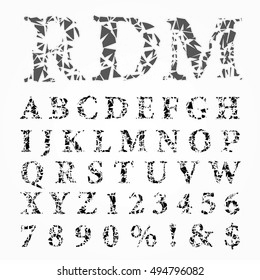

In [8]:
damagedImageLink = 'https://www.shutterstock.com/image-vector/grunge-broken-alphabet-vector-glass-260nw-494796082.jpg'

with requests.Session() as s:
    imgLetras = imread_url_bgr(damagedImageLink, session=s)

imgLetrasGr = cv2.cvtColor(imgLetras, cv2.COLOR_BGR2GRAY)
imgLetrasGr

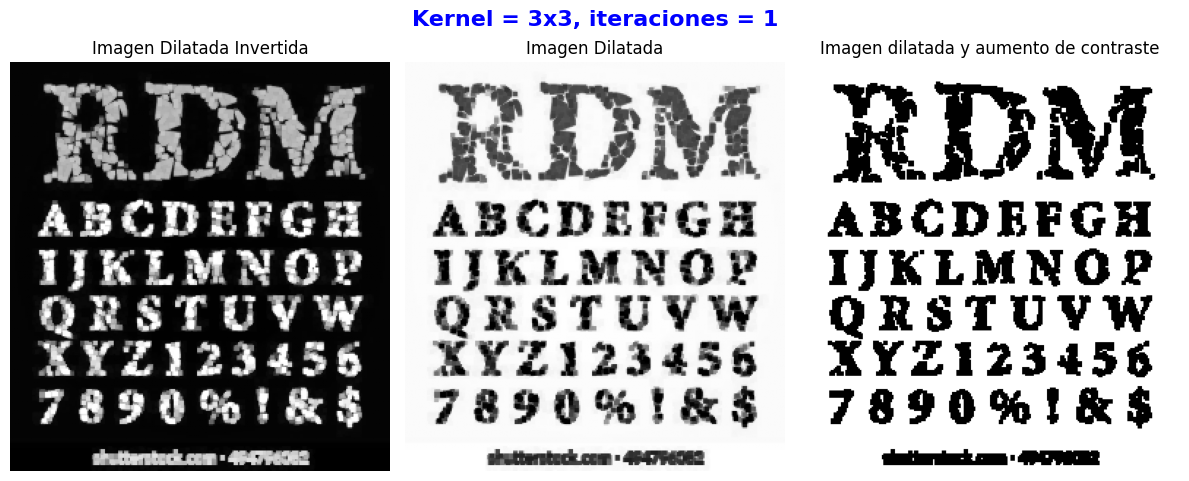

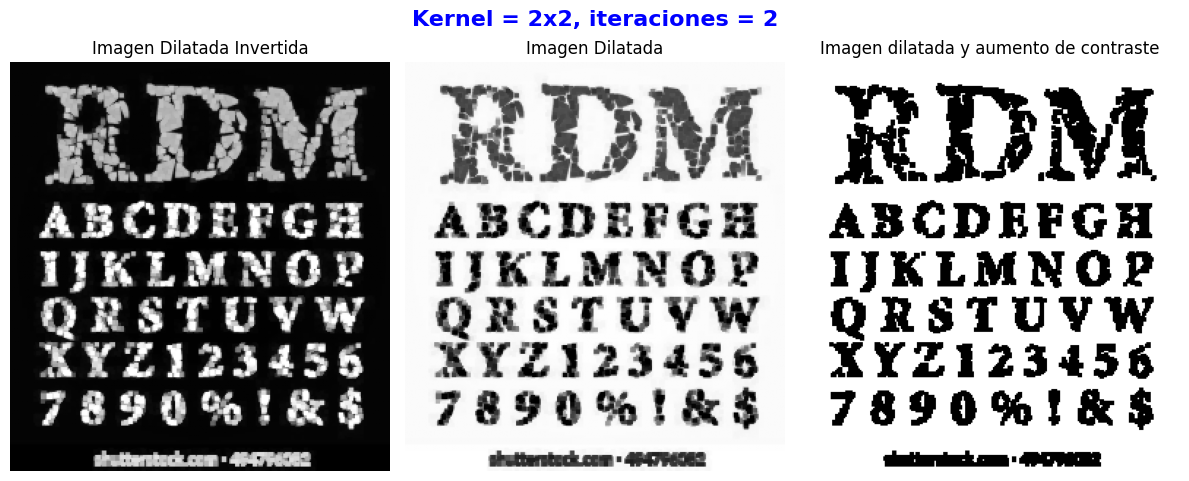

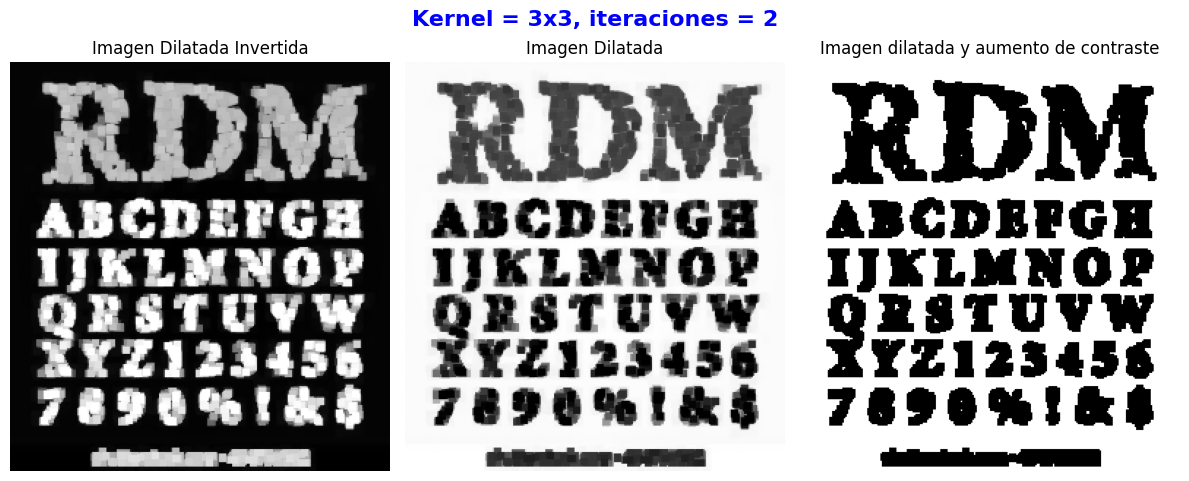

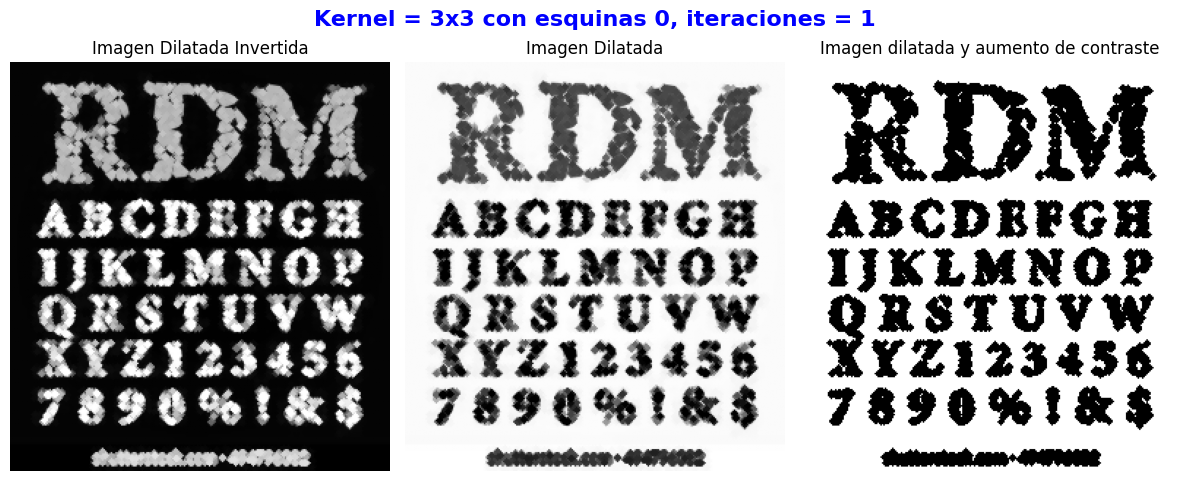

In [98]:
#Creación de kernel para el tamaño de dilatación
kernel1 = np.ones((2, 2), np.uint8)
kernel2 = np.ones((3, 3), np.uint8)
kernel3 = np.array(((0,1,0),
                    (1,1,1),
                    (0,1,0)), np.uint8)

#LLamado de funcion para aplicar dilatación
dilated1 = cv2.dilate(cv2.bitwise_not(imgLetrasGr), kernel1, iterations=1)
dilated2 = cv2.dilate(cv2.bitwise_not(imgLetrasGr), kernel2, iterations=1)

dilated3 = cv2.dilate(cv2.bitwise_not(imgLetrasGr), kernel1, iterations=2)
dilated4 = cv2.dilate(cv2.bitwise_not(imgLetrasGr), kernel2, iterations=2)

dilated5 = cv2.dilate(cv2.bitwise_not(imgLetrasGr), kernel3, iterations=2)

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
ind = 0
row = 0
fig.suptitle('Kernel = 2x2, iteraciones = 1',fontweight='bold', fontsize=16,color='blue')
axes[ind].imshow(dilated1,'gray')
axes[ind].set_title("Imagen Dilatada Invertida")
axes[ind].axis("off")
ind += 1
imgDilatada = cv2.bitwise_not(dilated1)
axes[ind].imshow(imgDilatada,'gray')
axes[ind].set_title("Imagen Dilatada")
axes[ind].axis("off")
ind += 1
ret, imgThresh = cv2.threshold(imgDilatada,175,255,cv2.THRESH_BINARY)
axes[ind].imshow(imgThresh, 'gray')
axes[ind].set_title("Imagen dilatada y aumento de contraste")
axes[ind].axis("off")

plt.tight_layout()
fig.subplots_adjust(top=1.3)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
ind = 0
fig.suptitle('Kernel = 3x3, iteraciones = 1',fontweight='bold', fontsize=16,color='blue')

axes[ind].imshow(dilated2,'gray')
axes[ind].set_title("Imagen Dilatada Invertida")
axes[ind].axis("off")
ind += 1
imgDilatada = cv2.bitwise_not(dilated2)
axes[ind].imshow(imgDilatada,'gray')
axes[ind].set_title("Imagen Dilatada")
axes[ind].axis("off")
ind += 1
ret, imgThresh = cv2.threshold(imgDilatada,175,255,cv2.THRESH_BINARY)
axes[ind].imshow(imgThresh, 'gray')
axes[ind].set_title("Imagen dilatada y aumento de contraste")
axes[ind].axis("off")

plt.tight_layout()
fig.subplots_adjust(top=1.3)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
ind = 0
row = 0
fig.suptitle('Kernel = 2x2, iteraciones = 2',fontweight='bold', fontsize=16,color='blue')
axes[ind].imshow(dilated3,'gray')
axes[ind].set_title("Imagen Dilatada Invertida")
axes[ind].axis("off")
ind += 1
imgDilatada = cv2.bitwise_not(dilated3)
axes[ind].imshow(imgDilatada,'gray')
axes[ind].set_title("Imagen Dilatada")
axes[ind].axis("off")
ind += 1
ret, imgThresh = cv2.threshold(imgDilatada,175,255,cv2.THRESH_BINARY)
axes[ind].imshow(imgThresh, 'gray')
axes[ind].set_title("Imagen dilatada y aumento de contraste")
axes[ind].axis("off")

plt.tight_layout()
fig.subplots_adjust(top=1.3)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
ind = 0
fig.suptitle('Kernel = 3x3, iteraciones = 2',fontweight='bold', fontsize=16,color='blue')

axes[ind].imshow(dilated4,'gray')
axes[ind].set_title("Imagen Dilatada Invertida")
axes[ind].axis("off")
ind += 1
imgDilatada = cv2.bitwise_not(dilated4)
axes[ind].imshow(imgDilatada,'gray')
axes[ind].set_title("Imagen Dilatada")
axes[ind].axis("off")
ind += 1
ret, imgThresh = cv2.threshold(imgDilatada,175,255,cv2.THRESH_BINARY)
axes[ind].imshow(imgThresh, 'gray')
axes[ind].set_title("Imagen dilatada y aumento de contraste")
axes[ind].axis("off")

plt.tight_layout()
fig.subplots_adjust(top=1.3)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
ind = 0
fig.suptitle('Kernel = 3x3 con esquinas 0, iteraciones = 1',fontweight='bold', fontsize=16,color='blue')

axes[ind].imshow(dilated5,'gray')
axes[ind].set_title("Imagen Dilatada Invertida")
axes[ind].axis("off")
ind += 1
imgDilatada = cv2.bitwise_not(dilated5)
axes[ind].imshow(imgDilatada,'gray')
axes[ind].set_title("Imagen Dilatada")
axes[ind].axis("off")
ind += 1
ret, imgThresh = cv2.threshold(imgDilatada,175,255,cv2.THRESH_BINARY)
axes[ind].imshow(imgThresh, 'gray')
axes[ind].set_title("Imagen dilatada y aumento de contraste")
axes[ind].axis("off")

plt.tight_layout()
fig.subplots_adjust(top=1.3)
plt.show()

**Resultados:**

Con esta práctica se pudo observar el efecto que tiene la dilatación bajo diferentes variables, como lo son el tamaño del kernel, su estructura y el numero de iteraciones, lo cual denota lo flexible de esta herramienta que puede ser utilizada en multiples condiciones donde se requiera recuperar información de una imagen dañada para su mejor compresión.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("data/image.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("data/image.jpg",0)

(400, 700, 3) (400, 700, 3) (400, 700)


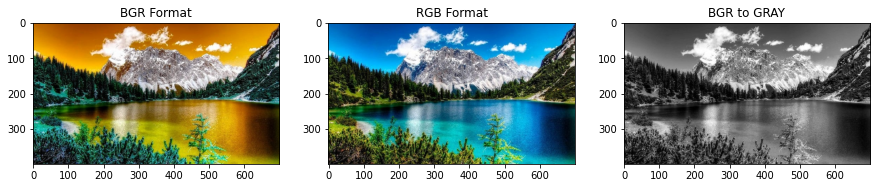

In [ ]:
#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15,8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2,cmap="gray")
    plt.show()

imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

## Erosion <a class="anchor" id="erosion" ></a>

Erosin primarily involves eroding(thinning) outer surface(foreground) of image
- Tt is suggested to have foreground as white

In [ ]:
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY,cmap="gray")
plt.show()

Eroding boundy of image upto 3 level

In [ ]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

for i in range(0,3):
    eroded = cv2.erode(BGR2GRAY.copy(), None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

### Binarize Image

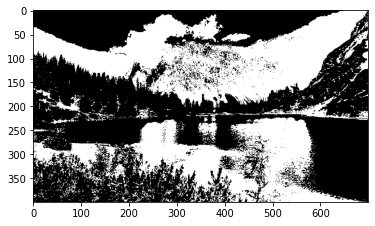

In [ ]:
binr = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### We can Invert Image to keep foreground in white

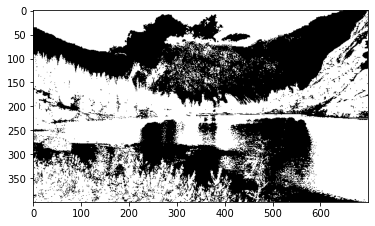

In [ ]:
invert = cv2.bitwise_not(binr)
image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Then, we can define a kernel of $5 \times 5$ to use in erosion

In [ ]:
kernel = np.ones((5,5), np.uint8) #check for 3*3 or 7*7 kernel size too
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


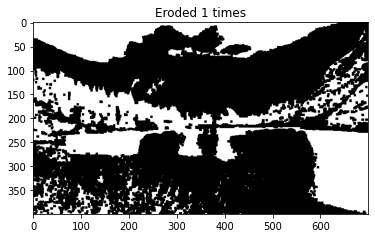

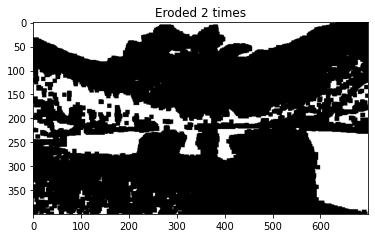

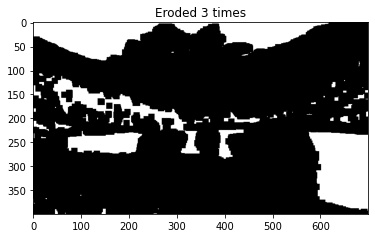

In [ ]:
for i in range(0,3):
    eroded = cv2.erode(invert.copy(),kernel=kernel, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

## Dilation <a class="anchor" id="dilation" ></a>

Involves dilating outer surface (foreground) of image
- For joining broken parts of an image together

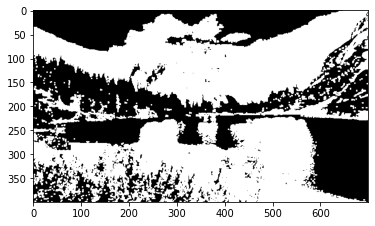

In [ ]:
#binarize image
binr = cv2.threshold(BGR2GRAY,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
invert = cv2.bitwise_not(binr)

#dilate image
dilation = cv2.dilate(binr, kernel, iterations=1)

plt.imshow(dilation, cmap='gray')
plt.show()

We can apply series of dilations on inverted image using no kernel


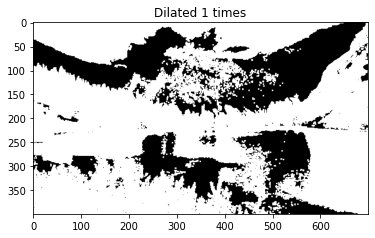

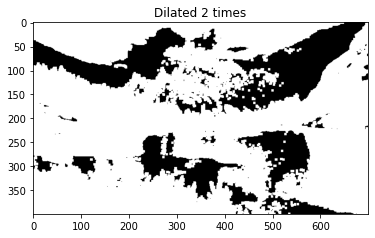

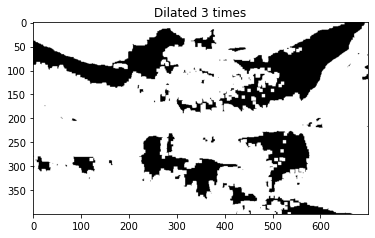

In [ ]:
for i in range(0,3):
    dilated = cv2.dilate(invert.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

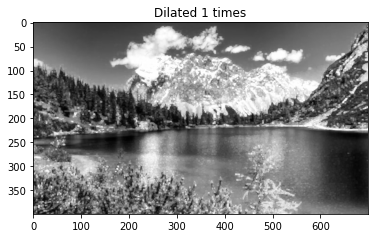

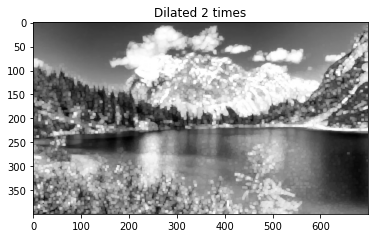

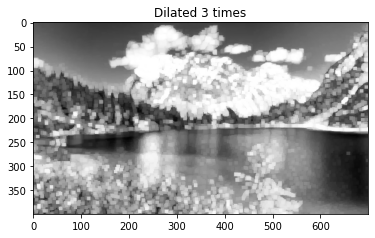

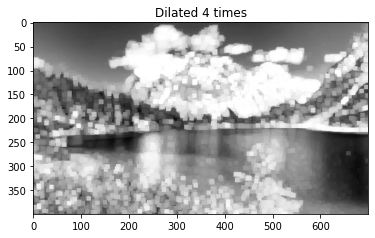

In [ ]:
for i in range(0,4):
    dilated = cv2.dilate(BGR2GRAY.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

## Opening <a class="anchor" id="opening" ></a>

Erosion followed by dilation in outer surface (foreground) of image
- Generally used to remove noise (small blobs) in image


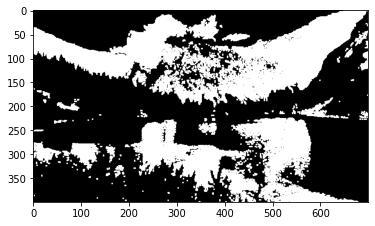

In [ ]:
#opening image
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)

#print output
plt.imshow(opening, cmap='gray')
plt.show()

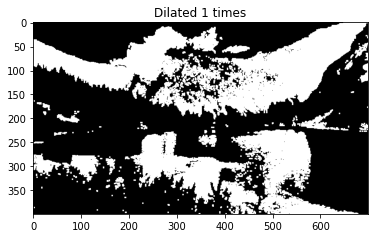

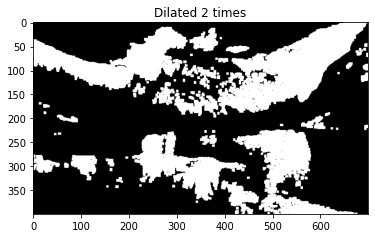

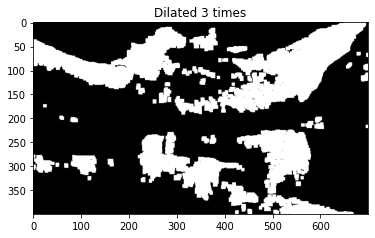

In [ ]:
for i in range(0,3):
    opening = cv2.morphologyEx(binr.copy(),cv2.MORPH_OPEN,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),opening)
    plt.show()

## Closing <a class="anchor" id="closing" ></a>

Dilation followed by erosion in outer surface (foreground) of image
- Generally used to close holes inside of objects or for connecting components together

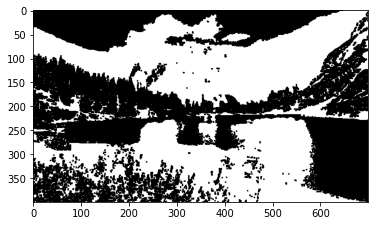

In [ ]:
#closing image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)

#print output
plt.imshow(closing,cmap='gray')
plt.show()

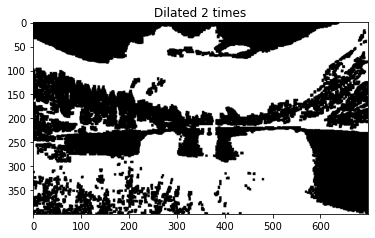

In [ ]:
for i in range(0,3):
    closing = cv2.morphologyEx(binr.copy(),cv2.MORPH_CLOSE,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),closing)
    plt.show()

Iterating with different kernels

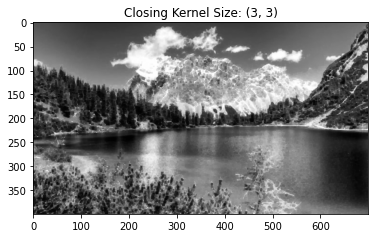

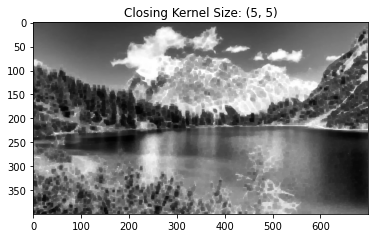

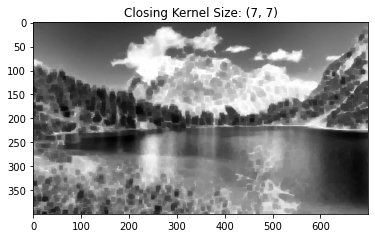

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_CLOSE, kernel)
    plt_imshow("Closing Kernel Size: ({}, {})".format(kernelSize[0], kernelSize[1]), closing)

## Morphological Gradient <a class="anchor" id="gradient" ></a>

It first applies erosion and dilation individually on image and then computes difference between eroded and dilated image

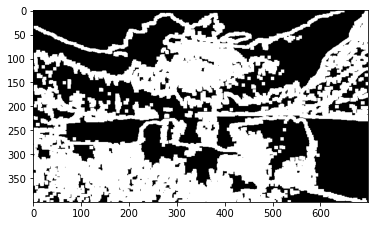

In [ ]:
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel)

#print output
plt.imshow(morph_gradient, cmap='gray')
plt.show()

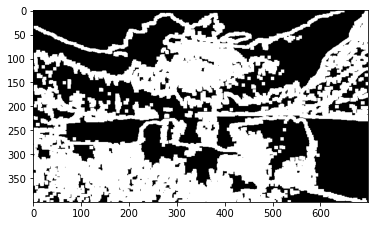

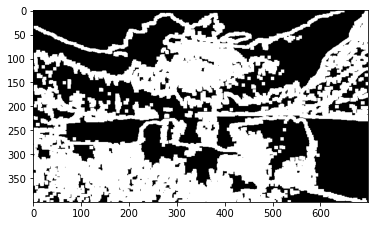

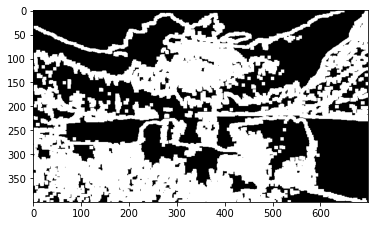

In [ ]:
for i in range(0,3):
    # use morph gradient
    morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel+i)
    #print output
    plt.imshow(morph_gradient, cmap='gray')
    plt.show()

Iterating with different kernels

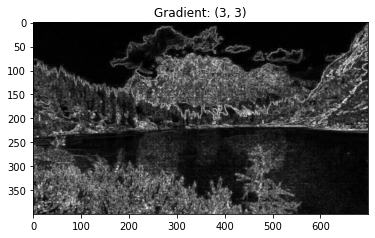

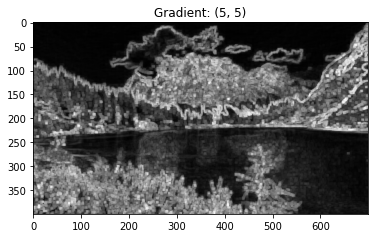

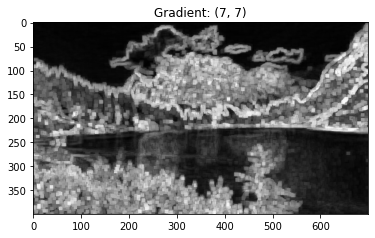

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_GRADIENT, kernel)
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)

## Morphological Hats <a class="anchor" id="hats" ></a>

1. Top or White Hat
2. Black hat

### Top or White Hat <a class="anchor" id="top" ></a>

It is the difference between original (grayscale/single channel) input image and opening image

- Finds light(bright) regions of an image on dark background


In [ ]:
#construct a kernel (13x5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

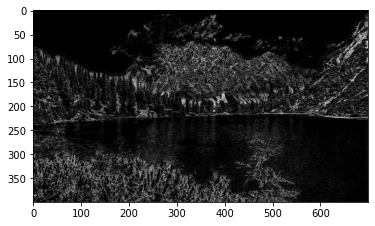

In [ ]:
tophat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap='gray')
plt.show()

### Black Hat <a class="anchor" id="black" ></a>

Output is a difference between input image & opened image
- Finds dark regions on a light background


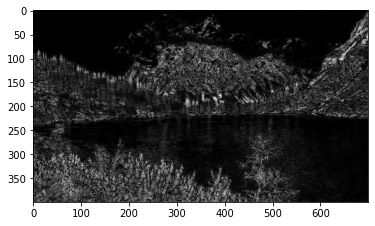

In [ ]:
blackhat = cv2.morphologyEx(BGR2GRAY,cv2.MORPH_BLACKHAT,kernel)

plt.imshow(blackhat, cmap='gray')
plt.show()